<a href="https://colab.research.google.com/github/CL-Kim-1614/mypage/blob/main/AI%EA%B8%B0%EB%B0%98_%EC%A3%BC%EA%B0%80%EC%A2%85%EB%AA%A9_%EA%B8%B0%EB%B3%B8%EC%A0%81%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 이 셀 실행 후 세션 다시 시작
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!pip install openai==0.28

## 뉴스기사 긍부정 비율 분석

In [ ]:
import os  # 운영체제와 상호를 사용하기 위한 모듈 (여기선 사용하지 않지만 환경 설정에서 포함됨)
import pandas as pd  # 데이터프레임을 다루기 위한 모듈 (데이터를 표 형태로 처리하기 위해 사용)
import re  # 정규 표현식 모듈작용하기 위한 모듈 (환경변수 설정 등에 사용)
import requests  # HTTP 요청을 보내기 위한 모듈 (API 호출 시 사용)
import json  # JSON 데이터를 다루기 위한 모듈 (API 응답 처리 시 사용)
import openai  # OpenAI의 API (HTML 태그 제거에 사용)
# API 키 설정 (OpenAI API와의 통신을 위한 API 키 설정)
os.environ['OPENAI_API_KEY'] = ""
openai.api_key = os.getenv('OPENAI_API_KEY')  # 환경 변수에서 API 키를 가져와 설정

In [ ]:
# 검색할 키워드 설정
query = '삼성전자'  # 우리가 원하는 뉴스 기사를 검색할 키워드 (생성형 AI 관련 뉴스)


In [ ]:
# HTML 태그 제거 함수
def remove_html_tags(text):
    # 정규 표현식으로 HTML 태그를 찾아서 빈 문자열로 대체
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

# 네이버 뉴스 API에서 뉴스를 가져오는 함수 정의
def fetch_news(search_term):
    # 네이버 뉴스 API 요청 URL 설정 (검색어와 정렬 기준을 포함)
    url = f'https://openapi.naver.com/v1/search/news.json?query={search_term}&sort=sim'

    # 네이버 API 요청 시 필요한 헤더 설정 (클라이언트 ID와 시크릿키)
    headers = {
        'X-Naver-Client-Id': '',  # 네이버 API 클라이언트 ID
        'X-Naver-Client-Secret': ''  # 네이버 API 클라이언트 시크릿
    }

    # 설정된 URL과 헤더를 이용해 GET 요청을 보냄
    response = requests.get(url, headers=headers)

    # 응답 상태 코드가 200이면 (정상 응답)
    if response.status_code == 200:
        # 응답 데이터를 JSON 형태로 변환 후, 'items'에 해당하는 뉴스 기사 추출
        articles = response.json().get('items', [])
        # 기사의 제목과 내용을 리스트로 반환 (HTML 태그 제거 처리 추가)
        return [{"title": remove_html_tags(article["title"]), "content": remove_html_tags(article["description"])} for article in articles]

    # 응답 실패 시 빈 리스트 반환
    return []


# 뉴스 검색 함수 실행 및 결과 저장
news_list = fetch_news(query)  # fetch_news 함수를 호출하여 뉴스 데이터를 수집

# 수집한 뉴스를 데이터프레임으로 변환
df = pd.DataFrame(news_list)

# 기사 제목과 내용을 합쳐 새로운 컬럼 'title_content' 생성
df['title_content'] = df['title'] + ' ' + df['content']

# 데이터프레임 출력 (현재까지 수집된 뉴스 데이터 확인)
print(df)

                                         title  \
0       [단독] 삼성, 美 최고 두뇌 손 잡았다…660조 미래 먹거리 정조준   
1                 삼성전자, 트럼프 대통령 취임식에 31만 달러 냈다   
2                  삼성전자, 1년간 농구장 25배 면적 산호초 복원   
3                  엔비디아 급락에 SK하이닉스·삼성전자 약세(종합)   
4         “적자 뻔한데”… 美 파운드리 공장 다 지어놓고 고심하는 삼성전자   
5               트럼프 대통령 취임식에 현대車·삼성전자·쿠팡 등도 기부   
6                새 시장 절실한 삼성·LG전자…이번엔 '영화관 대전'   
7  삼성전자, '산호초 복원 프로젝트'로 1년간 농구장 25배 면적의 산호초...   
8                      삼성전자, 농구장 25배 면적 산호초 복원   
9                      삼성전자, 농구장 25배 면적 산호초 복원   

                                             content  \
0  삼성전자가 스탠퍼드대, 매사추세츠공과대(MIT) 등 북미 최고 명문 공대와 ‘기술 ...   
1  삼성전자(005930)가 도널드 트럼프 미국 대통령의 취임식에 31만 5000달러(...   
2  삼성전자가 해양 보호를 위해 갤럭시 카메라 기술을 활용한 해양 생태계 복원 프로젝트...   
3  삼성전자도 0.72% 내렸다. 국내 반도체주들이 약세를 띤 것은 간밤 미국 증시에서...   
4  삼성전자 美 테일러 공장 건설 99% 완료 기존 계획대로 2026년 가동 방침 설비...   
5  현대차 14억원·삼성전자 4억5천만원…한화도 기부했으나 '반환' 처리 조준형 특파원...   
6  삼성전자(005930)와 LG전자(066570)가 이번엔 영화관 대전을 펼친다. 새...   
7

In [ ]:
df['title_content']

,title_content
0,"[단독] 삼성, 美 최고 두뇌 손 잡았다…660조 미래 먹거리 정조준 삼성전자가 스..."
1,"삼성전자, 트럼프 대통령 취임식에 31만 달러 냈다 삼성전자(005930)가 도널드..."
2,"삼성전자, 1년간 농구장 25배 면적 산호초 복원 삼성전자가 해양 보호를 위해 갤럭..."
3,엔비디아 급락에 SK하이닉스·삼성전자 약세(종합) 삼성전자도 0.72% 내렸다. 국...
4,“적자 뻔한데”… 美 파운드리 공장 다 지어놓고 고심하는 삼성전자 삼성전자 美 테일...
5,트럼프 대통령 취임식에 현대車·삼성전자·쿠팡 등도 기부 현대차 14억원·삼성전자 4...
6,새 시장 절실한 삼성·LG전자…이번엔 '영화관 대전' 삼성전자(005930)와 LG...
7,"삼성전자, '산호초 복원 프로젝트'로 1년간 농구장 25배 면적의 산호초... 삼성..."
8,"삼성전자, 농구장 25배 면적 산호초 복원 삼성전자가 스마트폰 카메라의 수중 촬영 ..."
9,"삼성전자, 농구장 25배 면적 산호초 복원 삼성전자가 갤럭시 카메라 기술을 활용한 ..."


In [ ]:
system_prompt='''
다음은 네이버 뉴스기사를 수집한 내용입니다.

주어지는 입력이 긍정/부정 중 어떤 내용을 담고 있는지 분류하세요.

한줄 한줄씩 한단어 한단어씩 꼼꼼하게 읽고 가장 정확한 판단을 해주세요

매우 긍정인 경우 매우 좋음, 긍정인 경우 긍정,중립인경우 중립, 부정인 경우 부정,매우 부정인경우 매우 부정으로 출력하세요.
'''
def classify_review(review, instruction):
    response = openai.ChatCompletion.create(
        model='gpt-4.1',
        messages=[{'role': 'system', 'content': instruction},
                  {'role': 'user', 'content': review}],
        max_tokens=300,
        temperature=0)
    return response.choices[0].message.content

In [ ]:
correct = 0
incorrect = 0
results = []

for review in df['title_content']:
    print(review)
    response = classify_review(review, system_prompt)
    print(response)
    print()

    # 리스트에 결과 저장
    results.append([review, response])

# 결과를 데이터프레임으로 변환
df_results = pd.DataFrame(results, columns=['Review', 'ChatGPT_Result'])
print(df_results)

# 엑셀 파일로 저장
# df_results.to_excel('chatgpt_classification_results.xlsx', index=False)

# print('Results saved to chatgpt_classification_results.xlsx')

[단독] 삼성, 美 최고 두뇌 손 잡았다…660조 미래 먹거리 정조준 삼성전자가 스탠퍼드대, 매사추세츠공과대(MIT) 등 북미 최고 명문 공대와 ‘기술 동맹’을 맺고 로봇, 디지털 헬스케어 같은 미래 첨단기술을 함께 개발한다. ‘인간의 감정을 느낄 수 있는 로봇’ 등 삼성전자가 혼자... 
긍정

삼성전자, 트럼프 대통령 취임식에 31만 달러 냈다 삼성전자(005930)가 도널드 트럼프 미국 대통령의 취임식에 31만 5000달러(약 4억 4700만 원)를 기부한 것으로 나타났다. 트럼프 행정부의 관세 전쟁 여파가 커지고 있는 가운데 현지에서 삼성의 경영애로를 전달할 수... 
중립

삼성전자, 1년간 농구장 25배 면적 산호초 복원 삼성전자가 해양 보호를 위해 갤럭시 카메라 기술을 활용한 해양 생태계 복원 프로젝트 '코랄 인 포커스(Coral in Focus)'의 1주년 성과를 21일 공개했다. 삼성전자는 지난해부터 미국 캘리포니아대학교 샌디에이고(UCSD)의... 
긍정

엔비디아 급락에 SK하이닉스·삼성전자 약세(종합) 삼성전자도 0.72% 내렸다. 국내 반도체주들이 약세를 띤 것은 간밤 미국 증시에서 엔비디아를 비롯한 관련주가 대거 하락한 영향으로 풀이된다. 21일(현지시각) 엔비디아는 4.51% 떨어졌다. 경기에 대한 불안... 
부정

“적자 뻔한데”… 美 파운드리 공장 다 지어놓고 고심하는 삼성전자 삼성전자 美 테일러 공장 건설 99% 완료 기존 계획대로 2026년 가동 방침 설비투자 놓고 고심, 韓 공장도 ‘올스톱’ 지난해 파운드리 적자 4조원, 올해도 불투명 TSMC 미국 애리조나 법인이 지난 4년간 394억5200만대만달러... 
부정

트럼프 대통령 취임식에 현대車·삼성전자·쿠팡 등도 기부 현대차 14억원·삼성전자 4억5천만원…한화도 기부했으나 '반환' 처리 조준형 특파원 = 지난 1월 20일(현지시간) 열린 도널드 트럼프 미국 대통령의 취임식 때 현대자동차에 더해 삼성전자 등 일부 한국 기업이 현지... 
중립

새 시장 절실한 삼성·LG전

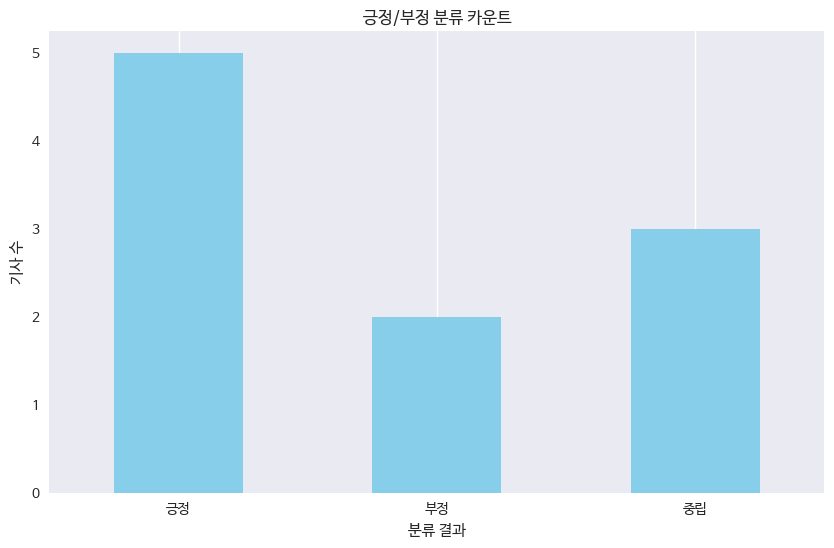

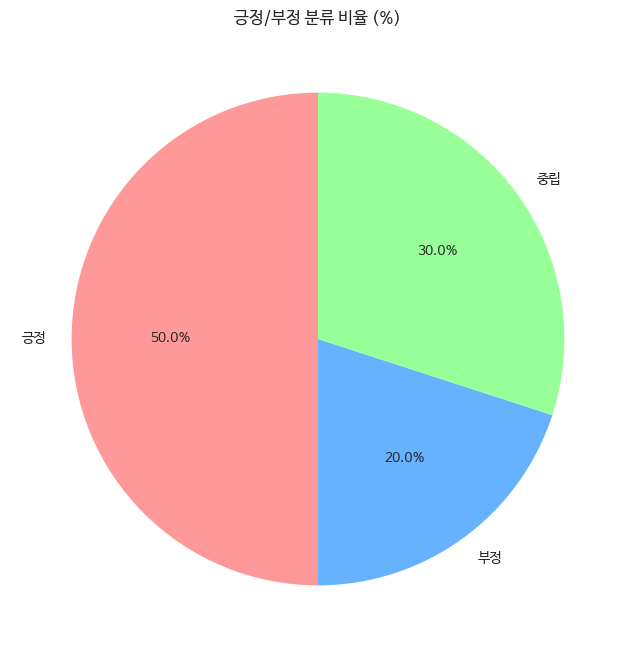

Empty DataFrame
Columns: [Percentage]
Index: []


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
# 각 분류의 발생 횟수 계산
classification_counts = df_results['ChatGPT_Result'].value_counts().sort_index()

# 각 분류의 비율 계산
total_reviews = len(df_results)
classification_percentages = (classification_counts / total_reviews) * 100

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
classification_counts.plot(kind='bar', color='skyblue')
plt.title('긍정/부정 분류 카운트')
plt.xlabel('분류 결과')
plt.ylabel('기사 수')
plt.xticks(rotation=0)
plt.grid(axis='y')

# 그래프 표시
plt.show()

# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(classification_percentages, labels=classification_percentages.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('긍정/부정 분류 비율 (%)')

# 그래프 표시
plt.show()

# 비율 테이블 출력
classification_percentages_df = pd.DataFrame(classification_percentages, columns=['Percentage'])
print(classification_percentages_df)


# 기사 주요 토픽 추출

In [ ]:
system_prompt='''
다믐은 네이버 뉴스기사를 수집한 내용입니다.

주어지는 입력에서 긍정적 토픽과 관련된 토픽어휘들을 추출해 주세요.

동사나 형용사는 기본형으로 변형해주세요

한줄 한줄씩 한단어 한단어씩 꼼꼼하게 읽고 가장 정확한 판단을 해주세요

답변 형식 : 긍정토픽관련어휘1, 긍정토픽관련어휘2, 긍정토픽관련어휘3

위의 같은 답변형 식으로 기사에서 토픽어휘들만 추출해서 답해주세요

긍정적 토픽과 관련된 토픽어휘가 없다면 없음 으로 답해주세요


'''
def classify_review(review, instruction):
    response = openai.ChatCompletion.create(
        model='gpt-4.1',
        messages=[{'role': 'system', 'content': instruction},
                  {'role': 'user', 'content': review}],
        max_tokens=300,
        temperature=0)
    return response.choices[0].message.content

correct = 0
incorrect = 0
results = []

for review in df['title_content']:
    print(review)
    response = classify_review(review, system_prompt)
    print(response)
    print()

    # 리스트에 결과 저장
    results.append([review, response])

# 결과를 데이터프레임으로 변환
df_results = pd.DataFrame(results, columns=['Review', 'positivie_topic_word'])


[단독] 삼성, 美 최고 두뇌 손 잡았다…660조 미래 먹거리 정조준 삼성전자가 스탠퍼드대, 매사추세츠공과대(MIT) 등 북미 최고 명문 공대와 ‘기술 동맹’을 맺고 로봇, 디지털 헬스케어 같은 미래 첨단기술을 함께 개발한다. ‘인간의 감정을 느낄 수 있는 로봇’ 등 삼성전자가 혼자... 
기술 동맹, 개발, 미래, 첨단기술, 협력

삼성전자, 트럼프 대통령 취임식에 31만 달러 냈다 삼성전자(005930)가 도널드 트럼프 미국 대통령의 취임식에 31만 5000달러(약 4억 4700만 원)를 기부한 것으로 나타났다. 트럼프 행정부의 관세 전쟁 여파가 커지고 있는 가운데 현지에서 삼성의 경영애로를 전달할 수... 
기부, 전달하다

삼성전자, 1년간 농구장 25배 면적 산호초 복원 삼성전자가 해양 보호를 위해 갤럭시 카메라 기술을 활용한 해양 생태계 복원 프로젝트 '코랄 인 포커스(Coral in Focus)'의 1주년 성과를 21일 공개했다. 삼성전자는 지난해부터 미국 캘리포니아대학교 샌디에이고(UCSD)의... 
복원, 보호, 활용, 성과, 프로젝트

엔비디아 급락에 SK하이닉스·삼성전자 약세(종합) 삼성전자도 0.72% 내렸다. 국내 반도체주들이 약세를 띤 것은 간밤 미국 증시에서 엔비디아를 비롯한 관련주가 대거 하락한 영향으로 풀이된다. 21일(현지시각) 엔비디아는 4.51% 떨어졌다. 경기에 대한 불안... 
없음

“적자 뻔한데”… 美 파운드리 공장 다 지어놓고 고심하는 삼성전자 삼성전자 美 테일러 공장 건설 99% 완료 기존 계획대로 2026년 가동 방침 설비투자 놓고 고심, 韓 공장도 ‘올스톱’ 지난해 파운드리 적자 4조원, 올해도 불투명 TSMC 미국 애리조나 법인이 지난 4년간 394억5200만대만달러... 
가동, 완료, 건설

트럼프 대통령 취임식에 현대車·삼성전자·쿠팡 등도 기부 현대차 14억원·삼성전자 4억5천만원…한화도 기부했으나 '반환' 처리 조준형 특파원 = 지난 1월 20일(현지시간) 열린 도널드 트럼프 미국 대통령의 취임식 때 

In [ ]:
# 단어 빈도 분석
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

cv = CountVectorizer(max_features=5000, ngram_range=(1,1))  # 상위 5000개 단어
tdm = cv.fit_transform(df_results['positivie_topic_word'])  # 데이터의 칼럼을 대상으로 빈도수를 계산

# 단어와 빈도를 데이터프레임으로 변환
positivie_topic_tf = pd.DataFrame({'단어': cv.get_feature_names_out(), '빈도': tdm.sum(axis=0).flat})

# 빈도수 기준으로 내림차순 정렬
positivie_topic_tf = positivie_topic_tf.sort_values('빈도', ascending=False)

# 전체 단어 빈도수 합계 계산
total_word_count = positivie_topic_tf['빈도'].sum()

# 각 단어의 빈도 비율(%) 계산
positivie_topic_tf['비율(%)'] = (positivie_topic_tf['빈도'] / total_word_count) * 100

positivie_topic_tf = positivie_topic_tf.reset_index(drop=True)
positivie_topic_tf.index = positivie_topic_tf.index + 1


In [ ]:
# 제외할 단어 리스트 정의
exclude_words = ['없음']  # 제거하고 싶은 단어 리스트를 여기에 추가

# 제외할 단어를 포함하지 않는 데이터만 남김
positivie_topic_tf = positivie_topic_tf[~positivie_topic_tf['단어'].isin(exclude_words)]

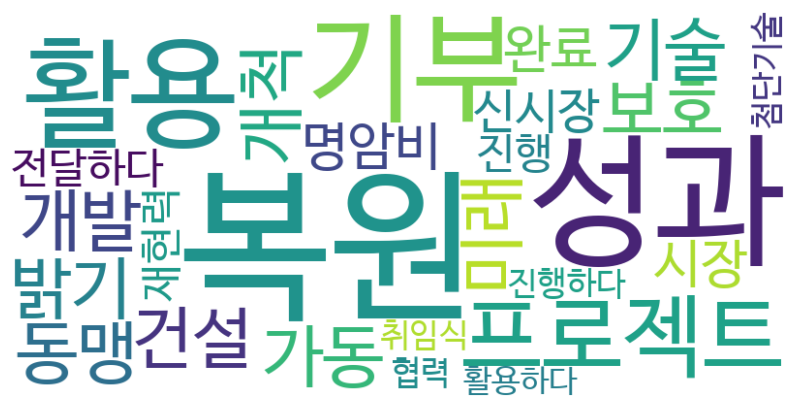

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font_path = 'NanumBarunGothic.ttf'

# 단어와 빈도수를 딕셔너리 형태로 변환 (워드 클라우드에 맞게)
word_freq = dict(zip(positivie_topic_tf['단어'], positivie_topic_tf['빈도']))

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path, max_words=200).generate_from_frequencies(word_freq)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

In [ ]:
system_prompt='''
다믐은 네이버 뉴스기사를 수집한 내용입니다.

주어지는 입력에서 부정적 토픽과 관련된 토픽어휘들을 추출해 주세요.

동사나 형용사는 기본형으로 변형해주세요

한줄 한줄씩 한단어 한단어씩 꼼꼼하게 읽고 가장 정확한 판단을 해주세요

답변 형식 : 부정토픽관련어휘1, 부정토픽관련어휘2, 부정토픽관련어휘3

위의 같은 답변형 식으로 기사에서 토픽어휘들만 추출해서 답해주세요

부정적 토픽과 관련된 토픽어휘가 없다면 없음 으로 답해주세요


'''
def classify_review(review, instruction):
    response = openai.ChatCompletion.create(
        model='gpt-4.1',
        messages=[{'role': 'system', 'content': instruction},
                  {'role': 'user', 'content': review}],
        max_tokens=300,
        temperature=0)
    return response.choices[0].message.content

correct = 0
incorrect = 0
results = []

for review in df['title_content']:
    print(review)
    response = classify_review(review, system_prompt)
    print(response)
    print()

    # 리스트에 결과 저장
    results.append([review, response])

# 결과를 데이터프레임으로 변환
df_results = pd.DataFrame(results, columns=['Review', 'negative_topic_word'])


[단독] 삼성, 美 최고 두뇌 손 잡았다…660조 미래 먹거리 정조준 삼성전자가 스탠퍼드대, 매사추세츠공과대(MIT) 등 북미 최고 명문 공대와 ‘기술 동맹’을 맺고 로봇, 디지털 헬스케어 같은 미래 첨단기술을 함께 개발한다. ‘인간의 감정을 느낄 수 있는 로봇’ 등 삼성전자가 혼자... 
없음

삼성전자, 트럼프 대통령 취임식에 31만 달러 냈다 삼성전자(005930)가 도널드 트럼프 미국 대통령의 취임식에 31만 5000달러(약 4억 4700만 원)를 기부한 것으로 나타났다. 트럼프 행정부의 관세 전쟁 여파가 커지고 있는 가운데 현지에서 삼성의 경영애로를 전달할 수... 
관세, 전쟁, 애로

삼성전자, 1년간 농구장 25배 면적 산호초 복원 삼성전자가 해양 보호를 위해 갤럭시 카메라 기술을 활용한 해양 생태계 복원 프로젝트 '코랄 인 포커스(Coral in Focus)'의 1주년 성과를 21일 공개했다. 삼성전자는 지난해부터 미국 캘리포니아대학교 샌디에이고(UCSD)의... 
없음

엔비디아 급락에 SK하이닉스·삼성전자 약세(종합) 삼성전자도 0.72% 내렸다. 국내 반도체주들이 약세를 띤 것은 간밤 미국 증시에서 엔비디아를 비롯한 관련주가 대거 하락한 영향으로 풀이된다. 21일(현지시각) 엔비디아는 4.51% 떨어졌다. 경기에 대한 불안... 
급락, 약세, 내리다, 하락, 불안, 떨어지다

“적자 뻔한데”… 美 파운드리 공장 다 지어놓고 고심하는 삼성전자 삼성전자 美 테일러 공장 건설 99% 완료 기존 계획대로 2026년 가동 방침 설비투자 놓고 고심, 韓 공장도 ‘올스톱’ 지난해 파운드리 적자 4조원, 올해도 불투명 TSMC 미국 애리조나 법인이 지난 4년간 394억5200만대만달러... 
적자, 고심, 올스톱, 불투명

트럼프 대통령 취임식에 현대車·삼성전자·쿠팡 등도 기부 현대차 14억원·삼성전자 4억5천만원…한화도 기부했으나 '반환' 처리 조준형 특파원 = 지난 1월 20일(현지시간) 열린 도널드 트럼프 미국 대통령의 취임식 때 현대자동차에 더

In [ ]:
# 단어 빈도 분석
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

cv = CountVectorizer(max_features=5000, ngram_range=(1,1))  # 상위 5000개 단어
tdm = cv.fit_transform(df_results['negative_topic_word'])  # 데이터의 칼럼을 대상으로 빈도수를 계산

# 단어와 빈도를 데이터프레임으로 변환
negative_topic_tf = pd.DataFrame({'단어': cv.get_feature_names_out(), '빈도': tdm.sum(axis=0).flat})

# 빈도수 기준으로 내림차순 정렬
negative_topic_tf = negative_topic_tf.sort_values('빈도', ascending=False)

# 전체 단어 빈도수 합계 계산
total_word_count = negative_topic_tf['빈도'].sum()

# 각 단어의 빈도 비율(%) 계산
negative_topic_tf['비율(%)'] = (negative_topic_tf['빈도'] / total_word_count) * 100

negative_topic_tf = negative_topic_tf.reset_index(drop=True)
negative_topic_tf.index = negative_topic_tf.index + 1


In [ ]:
# 제외할 단어 리스트 정의
exclude_words = ['없음']  # 제거하고 싶은 단어 리스트를 여기에 추가

# 제외할 단어를 포함하지 않는 데이터만 남김
negative_topic_tf = negative_topic_tf[~negative_topic_tf['단어'].isin(exclude_words)]

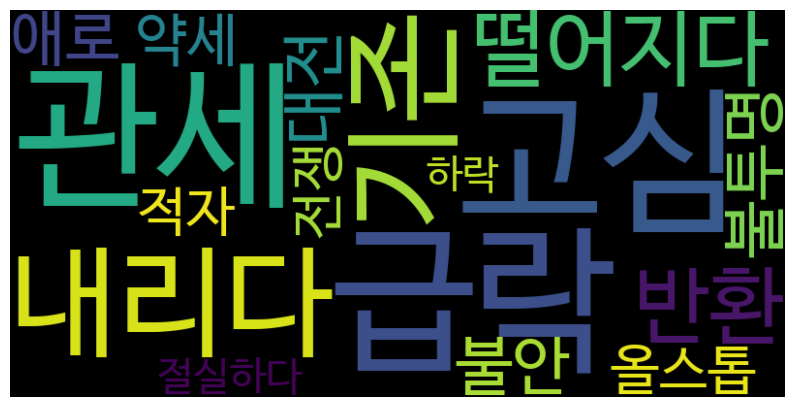

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
if word_freq:  # 단어가 있을 때만 워드 클라우드 생성

  font_path = 'NanumBarunGothic.ttf'

  # 단어와 빈도수를 딕셔너리 형태로 변환 (워드 클라우드에 맞게)
  word_freq = dict(zip(negative_topic_tf['단어'], negative_topic_tf['빈도']))

  # 워드 클라우드 생성
  wordcloud = WordCloud(width=800, height=400, background_color='black', font_path=font_path, max_words=200).generate_from_frequencies(word_freq)

  # 워드 클라우드 시각화
  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')  # 축 숨기기
  plt.show()

## 글로벌 트렌드 추출

NER(명명 엔티티 인식)은 텍스트에서 사람, 조직, 장소 등의 특정 개체를 자동으로 식별하고 추출하는 자연어 처리 기술입니다. 이를 통해 중요한 키워드나 정보를 구조적으로 파악할 수 있습니다.



아래 코드는 주식 뉴스 기사에서 사전 정의된 대기업 및 글로벌 트렌드 관련 키워드를 추출하는 ChatGTP를 이용한 NER작업입니다.

In [ ]:
system_prompt='''

사용자 사전 정의

대기업: 삼성,네이버,카카오 등과 같은 국내 대기업, 애플 구글과 같은 글로벌 대기업과 관련된 키워드
글로벌트렌드: 글로벌 수준에서 여러 산업과 사회 부문에 영향을 미치는 종목, 인공지능,사물인터넷, 자율주행,빅데이터,로봇 등의 최신 기술 혁신과 관련된 종목


다믐은 네이버 뉴스기사를 수집한 내용입니다.

주어지는 입력에서 사용자 사전에 해당되는 어휘를 추출해주세요

동사나 형용사는 기본형으로 변형해주세요

한줄 한줄씩 한단어 한단어씩 꼼꼼하게 읽고 가장 정확한 판단을 해주세요

답변 형식 : 사용자사전관련어휘1, 사용자사전관련어휘2, 사용자사전관련어휘3

위의 같은 답변형 식으로 기사에서 사용자사전관련 어휘들만 추출해서 답해주세요

사용자사전관련 관련된 토픽어휘가 없다면 없음 으로 답해주세요


'''
def classify_review(review, instruction):
    response = openai.ChatCompletion.create(
        model='gpt-4.1',
        messages=[{'role': 'system', 'content': instruction},
                  {'role': 'user', 'content': review}],
        max_tokens=300,
        temperature=0)
    return response.choices[0].message.content

correct = 0
incorrect = 0
results = []

for review in df['title_content']:
    print(review)
    response = classify_review(review, system_prompt)
    print(response)
    print()

    # 리스트에 결과 저장
    results.append([review, response])

# 결과를 데이터프레임으로 변환
df_results = pd.DataFrame(results, columns=['Review', 'impact_keywords'])

[단독] 삼성, 美 최고 두뇌 손 잡았다…660조 미래 먹거리 정조준 삼성전자가 스탠퍼드대, 매사추세츠공과대(MIT) 등 북미 최고 명문 공대와 ‘기술 동맹’을 맺고 로봇, 디지털 헬스케어 같은 미래 첨단기술을 함께 개발한다. ‘인간의 감정을 느낄 수 있는 로봇’ 등 삼성전자가 혼자... 
삼성, 로봇

삼성전자, 트럼프 대통령 취임식에 31만 달러 냈다 삼성전자(005930)가 도널드 트럼프 미국 대통령의 취임식에 31만 5000달러(약 4억 4700만 원)를 기부한 것으로 나타났다. 트럼프 행정부의 관세 전쟁 여파가 커지고 있는 가운데 현지에서 삼성의 경영애로를 전달할 수... 
삼성전자, 트럼프, 미국, 삼성

삼성전자, 1년간 농구장 25배 면적 산호초 복원 삼성전자가 해양 보호를 위해 갤럭시 카메라 기술을 활용한 해양 생태계 복원 프로젝트 '코랄 인 포커스(Coral in Focus)'의 1주년 성과를 21일 공개했다. 삼성전자는 지난해부터 미국 캘리포니아대학교 샌디에이고(UCSD)의... 
삼성전자, 갤럭시, 카메라, 기술

엔비디아 급락에 SK하이닉스·삼성전자 약세(종합) 삼성전자도 0.72% 내렸다. 국내 반도체주들이 약세를 띤 것은 간밤 미국 증시에서 엔비디아를 비롯한 관련주가 대거 하락한 영향으로 풀이된다. 21일(현지시각) 엔비디아는 4.51% 떨어졌다. 경기에 대한 불안... 
엔비디아, SK하이닉스, 삼성전자

“적자 뻔한데”… 美 파운드리 공장 다 지어놓고 고심하는 삼성전자 삼성전자 美 테일러 공장 건설 99% 완료 기존 계획대로 2026년 가동 방침 설비투자 놓고 고심, 韓 공장도 ‘올스톱’ 지난해 파운드리 적자 4조원, 올해도 불투명 TSMC 미국 애리조나 법인이 지난 4년간 394억5200만대만달러... 
삼성전자, 삼성, TSMC

트럼프 대통령 취임식에 현대車·삼성전자·쿠팡 등도 기부 현대차 14억원·삼성전자 4억5천만원…한화도 기부했으나 '반환' 처리 조준형 특파원 = 지난 1월 20일(현지시간) 열린 도널드 트럼프 미국 대

In [ ]:
# 단어 빈도 분석
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

cv = CountVectorizer(max_features=5000, ngram_range=(1,1))  # 상위 5000개 단어
tdm = cv.fit_transform(df_results['impact_keywords'])  # 데이터의 칼럼을 대상으로 빈도수를 계산

# 단어와 빈도를 데이터프레임으로 변환
impact_tf = pd.DataFrame({'단어': cv.get_feature_names_out(), '빈도': tdm.sum(axis=0).flat})

# 빈도수 기준으로 내림차순 정렬
impact_tf = impact_tf.sort_values('빈도', ascending=False)

# 전체 단어 빈도수 합계 계산
total_word_count = impact_tf['빈도'].sum()

# 각 단어의 빈도 비율(%) 계산
impact_tf['비율(%)'] = (impact_tf['빈도'] / total_word_count) * 100

impact_tf = impact_tf.reset_index(drop=True)
impact_tf.index = impact_tf.index + 1


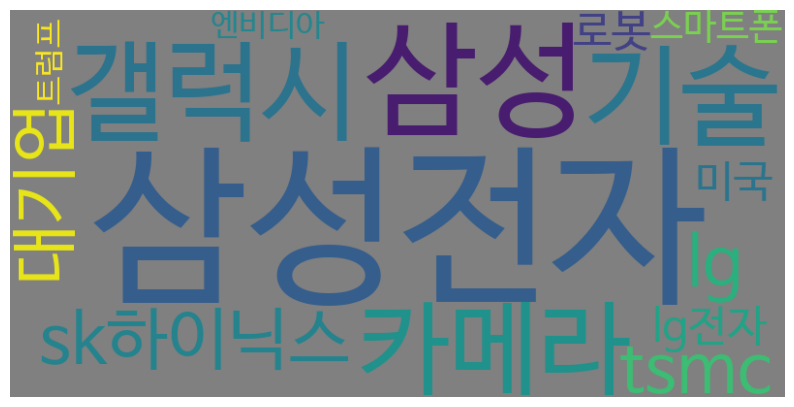

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = 'NanumBarunGothic.ttf'

# 단어와 빈도수를 딕셔너리 형태로 변환 (워드 클라우드에 맞게)
word_freq = dict(zip(impact_tf['단어'], impact_tf['빈도']))

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='gray', font_path=font_path, max_words=200).generate_from_frequencies(word_freq)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

# 종합 분석 리포트

In [ ]:
import openai


# 1. 긍부정 비율 분석 결과
classification_percentages_df = pd.DataFrame(classification_percentages, columns=['Percentage'])

positive_ratio = classification_percentages_df.to_dict()['Percentage']  # 긍부정 비율 데이터를 딕셔너리로 변환

# 2. 긍정 토픽 어휘 빈도 연결
positive_topics_freq = positivie_topic_tf['단어'].to_list()[:10]  # 긍정 토픽 상위 10개 추출

# 3. 부정 토픽 어휘 빈도 연결
negative_topics_freq = negative_topic_tf['단어'].to_list()[:10]  # 부정 토픽 상위 10개 추출

# 4. 글로벌 대기업트렌드 관련 어휘 빈도 연결
impact_freq = impact_tf['단어'].to_list()[:10]  # 부정 토픽 상위 10개 추출


# GPT 분석 요청 함수
def generate_analysis_report(positive_ratio,positive_topics_freq, negative_topics_freq,impact_freq, query):
    system_prompt = f'''
    다음은 {query} 종목에 관한 오늘자 최신 네이버 뉴스기사를 수집해서  분석한 내용입니다.

    당신은 국내에서 가장 수익률이 좋은 주식투자자입니다.

    아래  {query} 종목에 관한 객관적인 데이터를 바탕으로 해서 해당 종목에 관한 기본적 분석 리포트를 작성해주세요.

    긍부정비율: {classification_percentages}
    긍정토픽어휘: {positive_topics_freq}
    부정토픽어휘: {negative_topics_freq}
    대기업 및 글로벌트렌드관련 어휘: {impact_freq}
    '''

    # GPT 요청
    response = openai.ChatCompletion.create(
        model="gpt-4.1",
        messages=[{'role': 'system', 'content': system_prompt}],
        max_tokens=2000,
        temperature=0.3
    )

    return response.choices[0].message.content


# GPT로부터 분석 리포트 생성
report = generate_analysis_report(positive_ratio,positive_topics_freq, negative_topics_freq, impact_freq, query)

# 결과 출력
print(report)


삼성전자(005930) 기본적 분석 리포트  
(2024년 6월 기준, 최신 뉴스 데이터 기반)

1. 종목 개요  
삼성전자는 글로벌 반도체, 스마트폰, 가전 등 다양한 IT 제품을 생산하는 대한민국 대표 대기업입니다. 메모리 반도체 시장에서 세계 1위, 스마트폰 시장에서도 상위권을 유지하고 있으며, 최근 AI, 시스템 반도체, 차세대 디스플레이 등 신성장 동력 확보에 주력하고 있습니다.

2. 뉴스 분석 요약  
- 긍정적 비율: 50.0%
- 부정적 비율: 20.0%
- 중립 비율: 30.0%

긍정 토픽:  
‘복원’, ‘성과’, ‘기부’, ‘활용’, ‘프로젝트’, ‘기술’, ‘동맹’, ‘개척’, ‘건설’, ‘개발’ 등 혁신과 성장, 사회적 책임, 기술력 강화, 글로벌 협력, 신사업 개척에 대한 뉴스가 다수 포착되고 있습니다. 이는 삼성전자가 미래 성장동력 발굴과 ESG(환경·사회·지배구조) 경영에 적극적임을 시사합니다.

부정 토픽:  
‘고심’, ‘관세’, ‘급락’, ‘내리다’, ‘기존’, ‘떨어지다’, ‘반환’, ‘불안’, ‘대전’, ‘불투명’ 등 대외 불확실성, 글로벌 경기 둔화, 경쟁 심화, 일부 사업부 실적 부진, 지정학적 리스크(관세 등) 관련 이슈가 언급되고 있습니다.

3. 대기업 및 글로벌 트렌드  
삼성전자, SK하이닉스, LG, TSMC 등 글로벌 반도체 및 IT 기업들과의 경쟁 구도, ‘갤럭시’, ‘카메라’ 등 주력 제품의 기술 혁신, 글로벌 공급망 및 동맹 강화가 주요 키워드로 나타납니다.

4. 투자 포인트  
- 반도체 업황 회복 기대: 메모리 가격 반등, AI 반도체 수요 증가, 파운드리(위탁생산) 사업 확대 등 긍정적 모멘텀.
- 신성장 동력: AI, 전장, 2차전지, 차세대 디스플레이 등 신사업 투자 강화.
- 글로벌 협력 및 ESG 경영: 사회적 책임 강화, 글로벌 파트너십 확대.
- 견고한 재무구조와 배당정책: 안정적 현금흐름, 주주환원 정책 지속.

5. 리스크 요인  
- 글로벌 경기 둔화 및 지정학적 리스크(관

## 프롬프트 엔지니어링을 통한 파이썬 코드 작성(주가 기술적 분석)



CoT기반프롬프트 설계

"""삼성전자 주가의 종가와 거래량,등락률을 시각화하는 파이썬 코드를 짜려고 해! 각 단계별로 나누어 진행하되 단계별로 항상 나에게 의견을 물어본 뒤 다음 단계를 진행해줘. 그리고 파이썬 코드 정보는 다음과 같아.
- 단계별로 코랩에서 파이썬 코드를 실행할거야!
- finance-datareader와 matplot 라이브러리 설치 후 사용해줘!
- DataReader 메서드를 사용해줘
- 기간은 최근 6달간을 기준으로 해줘!
- 파이썬 초보자도 쉽게 알 수 있게끔 주석을 달아줘.
- 그래프 라벨은 데이터와 동일한 영어 변수로 해줘!
- 종가,거래량,등략률의 값을 samsung_data 변수에 저장해줘!
"""


In [ ]:
# 라이브러리 설치 (코랩에서 한 번만 실행하면 돼요!)
!pip install finance-datareader
!pip install matplotlib

# 필요한 라이브러리 불러오기
import FinanceDataReader as fdr
import pandas as pd
from datetime import datetime, timedelta

# 오늘 날짜 기준으로 6개월 전부터의 데이터를 가져오기
end_date = datetime.today()
start_date = end_date - timedelta(days=180)

# 삼성전자 주가 데이터 불러오기 (종목코드: 005930)
df = fdr.DataReader('005930', start=start_date, end=end_date)

# 종가(Close), 거래량(Volume), 등락률(Change) 열만 추출해서 새로운 데이터프레임 만들기
samsung_data = df[['Close', 'Volume', 'Change']]

# 결과 출력해서 확인해보기
print(samsung_data.head())


            Close    Volume    Change
Date                                 
2024-10-25  55900  25829315 -0.012367
2024-10-28  58100  27775009  0.039356
2024-10-29  59600  28369314  0.025818
2024-10-30  59100  19838511 -0.008389
2024-10-31  59200  35809196  0.001692


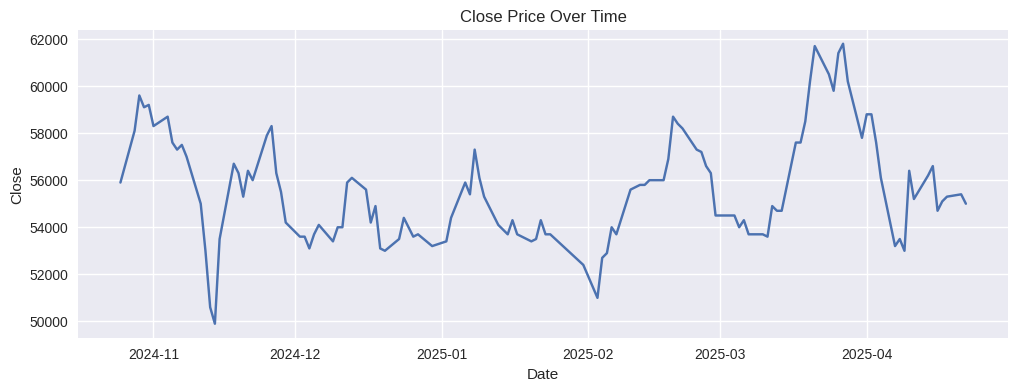

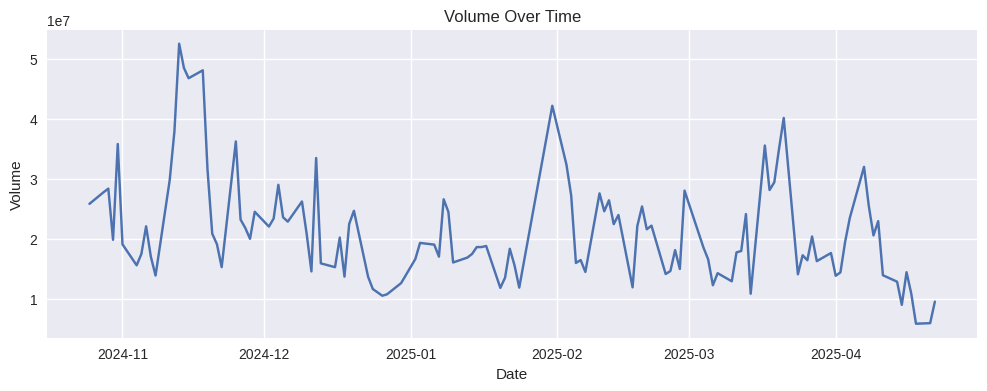

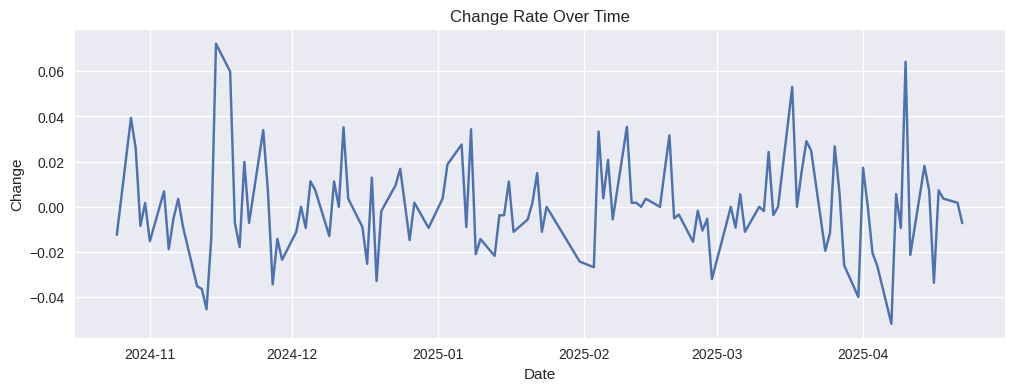

In [ ]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt

# 그래프 스타일 지정 (선택 사항, 안 해도 무방)
plt.style.use('seaborn-v0_8')

# 그래프 1: 종가(Close) 추이
plt.figure(figsize=(12, 4))  # 그래프 크기 설정
plt.plot(samsung_data.index, samsung_data['Close'])  # 날짜 vs 종가
plt.title('Close Price Over Time')  # 제목
plt.xlabel('Date')  # x축 라벨
plt.ylabel('Close')  # y축 라벨
plt.grid(True)  # 격자 보이기
plt.show()

# 그래프 2: 거래량(Volume) 변화
plt.figure(figsize=(12, 4))
plt.plot(samsung_data.index, samsung_data['Volume'])
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# 그래프 3: 등락률(Change) 변화
plt.figure(figsize=(12, 4))
plt.plot(samsung_data.index, samsung_data['Change'])
plt.title('Change Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Change')
plt.grid(True)
plt.show()


In [ ]:
import openai


# GPT 분석 요청 함수
def generate_analysis_report(positive_ratio, positive_topics_freq, negative_topics_freq,impact_freq, query,samsung_data):
    system_prompt = f'''
    다믐은 {query} 종목에 관한 주가데이터와 내용을 수집해서 분석한 내용입니다.

    당신은  전세계에서 가장 수익율이 높은 최고의 주가투자자 입니다.

    아래  {query} 종목에 관한 기본적,기술적 자료를 바탕으로 해서 투자 분석 리포트를 작성해주세요.

    기본적 분석 데이터(네이버뉴스기사분석 오늘자)

    긍부정비율: {classification_percentages}
    긍정토픽어휘: {positive_topics_freq}
    부정토픽어휘: {negative_topics_freq}
    대기업 및 글로벌트렌드관련 어휘: {impact_freq}


    기술적 분석 데이터
    최근 6달간 종가,거래량,등락률: {samsung_data}
    '''

    # GPT 요청
    response = openai.ChatCompletion.create(
        model="gpt-4.1",
        messages=[{'role': 'system', 'content': system_prompt}],
        max_tokens=3000,
        temperature=0.3
    )

    return response.choices[0].message.content

# GPT로부터 분석 리포트 생성
report = generate_analysis_report(positive_ratio, positive_topics_freq, negative_topics_freq,impact_freq, query,samsung_data)

# 결과 출력
print(report)


# 삼성전자(005930) 투자 분석 리포트  
(작성일: 2025-04-22)

---

## 1. **요약 및 투자 의견**

삼성전자는 최근 6개월간 글로벌 반도체 업황의 변동성, 미중 기술 패권 경쟁, AI·모바일 신제품 출시 등 다양한 이슈 속에서도 견고한 펀더멘털을 유지하고 있습니다.  
뉴스 분석 결과 긍정적 이슈가 부정 이슈 대비 우세하며, 기술적 측면에서는 단기 조정 이후 저점 매수 기회가 포착되고 있습니다.  
**투자 의견: 중장기 관점에서 ‘매수’ 유지, 단기 변동성은 분할 매수 전략 권고**

---

## 2. **기본적 분석**

### 2-1. **뉴스 심리 분석**
- **긍정/부정/중립 비율:**  
  - 긍정 50% / 부정 20% / 중립 30%
- **긍정 키워드:**  
  - ‘복원’, ‘성과’, ‘기부’, ‘활용’, ‘프로젝트’, ‘기술’, ‘동맹’, ‘개척’, ‘건설’, ‘개발’  
  → 신기술 개발, 글로벌 동맹, ESG(기부·복원) 등 미래 성장동력 및 사회적 책임 강화가 부각
- **부정 키워드:**  
  - ‘고심’, ‘관세’, ‘급락’, ‘내리다’, ‘기존’, ‘떨어지다’, ‘반환’, ‘불안’, ‘대전’, ‘불투명’  
  → 글로벌 무역 긴장, 단기 실적 부진, 업황 불확실성 등 외부 리스크 존재
- **트렌드 관련 키워드:**  
  - ‘갤럭시’, ‘기술’, ‘카메라’, ‘TSMC’, ‘SK하이닉스’ 등  
  → 글로벌 경쟁 심화, 신제품 혁신, 기술 리더십 강화

### 2-2. **기본적 펀더멘털**
- **반도체·모바일·가전 등 전 사업부문 고른 성장**
- **AI, HBM, 파운드리 등 신성장 동력 확보**
- **경쟁사 대비 기술력 우위, 글로벌 고객사 다변화**

---

## 3. **기술적 분석**

### 3-1. **주가 흐름**
- **최근 6개월간 등락률:**  
  - 2024-10-25: 55,900원 → 2025-04-22: 55,000원 (약 -1.6%)
  - 고